# カーブフィッティング

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
from scipy.stats import bernoulli, norm, poisson, expon

# 日本語フォントの設定（Mac:'Hiragino Sans', Windows:'MS Gothic'）
plt.rcParams['font.family'] = 'Hiragino Sans'

## カーブフィッティングとは？

手元にあるデータをある理論曲線に当てはめることを**カーブフィッティング**と呼ぶ．
データ分析では，以下の場面でカーブフィッティングが用いられる：

1. 回帰分析
   - 複数の変数から成るデータに対して説明変数と目的変数の間の関数関係（理論曲線）を仮定し，パラメータを調整して当てはめる
2. 確率分布のパラメータ推定
   - 手元のデータから求めたヒストグラムに対して理論的な確率分布を仮定し，そのパラメータを推定する
   - 推定したパラメータを用いてヒストグラムに理論分布を当てはめる

※ 統計モデルでは，回帰分析における関数関係や理論的な確率分布など，データを当てはめる理論曲線そのものをモデルと呼ぶ．
一方，物理モデルでは，理論曲線のことはモデルと呼ばずに，理論曲線を導くための単純化した基礎方程式などをモデルと呼ぶ．

## 回帰分析

### 回帰モデル

データ $ X, Y $ が与えられたとき，変数 $ X,\ Y $ の間に

$$
	y = f(x; \boldsymbol{\theta}) + \varepsilon
$$(eq:regression_model)

という関数関係が成り立つとする．
ここで，$ f(x; \boldsymbol{\theta}) $ は変数 $ X $ の関数で $ \boldsymbol{\theta} = (\theta_1, \theta_2, \ldots) $ はパラメータである．
また，$ \varepsilon $ は確率的な誤差を表し，特定の確率分布に従うものとする．
この式は，与えられたデータ $ x $ に対して $ y $ を生成する数理モデルであり，**回帰モデル**と呼ばれる．
また，$ X $ を**説明変数**（独立変数），$ Y $ を**目的変数**（従属変数，被説明変数）と呼ぶ．
**回帰分析**とは，回帰モデルを用いて説明変数と目的変数の間の関係を明らかにする手法である．

回帰モデルには様々な種類が存在するが，式{eq}`eq:regression_model`のように説明変数が1つだけの場合を**単回帰モデル**，説明変数が複数ある場合を**重回帰モデル**と呼ぶ．
また，説明変数の１次関数で表されるモデルを**線形回帰モデル**，非線形な関数の場合を**非線形回帰モデル**と呼ぶ．
以下では，単回帰モデルのみを扱う．

### 最小二乗法

１つの説明変数 $ X $ と目的変数 $ Y $ について $ n $ 組のデータ $ (x_{1}, y_{1}), \ldots, (x_{n}, y_{n}) $ を取得したとする．
このとき，横軸に変数 $ X $，縦軸に変数 $ Y $ を取ったグラフを**散布図**と呼ぶ．
散布図に対し，回帰モデル{eq}`eq:regression_model`のパラメータを変化させて理論曲線をうまく当てはめる作業がカーブフィッティングである．
カーブフィッティングによって得られた式 $ f(x; \boldsymbol{\theta}) $ （**回帰曲線**）にデータの $ x_{i} $ を代入すると回帰モデルによる予測値が得られる．
以下では，この予測値をハット $\hat{}$ を付けて次のように表す：

$$
	\hat{y}_{i} = f(x_{i}; \boldsymbol{\theta})
$$(eq:regression_curve)


回帰分析では，最適な曲線を求める手法がいくつか存在するが，最も基本的な手法が**最小二乗法**である．
最小二乗法では，回帰モデルによる予測値 $ \hat{y}_{i}=f(x_{i}; \boldsymbol{\theta}) $ と実データ $ y_{i} $ の差（**残差**）の二乗和

$$
	E(\boldsymbol{\theta}) = \sum_{i=1}^{n}(\hat{y}-y_{i})^{2} = \sum_{i=1}^{n}(f(x_{i}; \boldsymbol{\theta})-y_{i})^{2}
$$(eq:rss)

が最小となるようなパラメータ $ \boldsymbol{\theta} = (\theta_1, \theta_2, \ldots) $ を選ぶ．
このとき，$ E $ のことを**残差変動**（残差二乗和）と呼ぶ．
残差変動 $ E $ を最小にすることは，$ \theta_1,\ \theta_2,\ \ldots $ を変数とする関数 $ E(\boldsymbol{\theta}) $ の最小値を求めることと言い換えられる．
このための必要条件は，残差変動 $ E(\boldsymbol{\theta}) $ の $ \theta_1,\ \theta_2,\ \ldots $ による偏微分がゼロになることである：

$$
	\frac{\partial E}{\partial \theta_1} = 0, \quad \frac{\partial E}{\partial \theta_2} = 0,\ \ldots
$$(eq:rss_diff)

### 線形単回帰モデル

#### 理論

線形単回帰モデルは

\begin{align}
 y = ax + b + \varepsilon
\end{align}

で与えられ，残差変動は

$$
	E(a, b) = \sum_{i=1}^{n} (ax_{i}+b - y_{i})^{2}
$$

と表される．
この場合には，最小二乗法による最適なパラメータ $ a,\ b $ を理論的に求めることができる．
実際に条件を適用すると，$ a,\ b $ を変数とする以下の連立方程式が得られる：

\begin{align*}
	\sum_{i=1}^{n} (ax_{i}+b-y_{i})x_{i} &= 0 \\
	\sum_{i=1}^{n} (ax_{i}+b-y_{i}) &= 0
\end{align*}

この連立方程式を解くと，最適解$ a,\ b $ は

\begin{align}
	a &=\frac{\displaystyle\left(\frac{1}{n}\sum_{i=1}^{n} x_{i}y_{i}\right) - \left(\frac{1}{n} \sum_{i=1}^{n}x_{i}\right)\left(\frac{1}{n}\sum_{i=1}^{n}y_{i}\right)}{\displaystyle \left(\frac{1}{n}\sum_{i=1}^{n} x_{i}^{2}\right) -  \left(\frac{1}{n}\sum_{i=1}^{n}x_{i}\right)^{2}}
	   = \frac{\overline{xy}-\bar{x}\bar{y}}{\overline{x^2}-\bar{x}^2} \\[10pt]
	b &= \left(\frac{1}{n} \sum_{i=1}^{n}y_{i}\right) - a\left(\frac{1}{n} \sum_{i=1}^{n}x_{i}\right) = \bar{y} - a \bar{x}
\end{align}

と求まる．
なお，傾き $ a $ の式の分子は $ X, Y $ の共分散，分母は $ X $ の分散となっている（相関係数の式に似ているが違う）．
よって，傾き $ a $ が正なら正の相関，負なら負の相関，ゼロなら無相関であることが分かる．

```{admonition} 分散公式と共分散
:class: dropdown
$ X $ の分散は以下のように表すことができる：

$$
\frac{1}{n} \sum_{i=1}^{n} (x_{i} - \bar{x})^{2} 
    = \frac{1}{n} \sum_{i=1}^{n} x_{i}^{2} - \left(\frac{1}{n} \sum_{i=1}^{n}x_{i}\right)^{2}
	= \overline{x^2}-\bar{x}^2
$$

これを**分散公式**と呼ぶ．
また，$ X, Y $ の共分散は分散公式を用いると以下のように表される：

$$
	\frac{1}{n} \sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y}) = \overline{xy} - \bar{x}\bar{y}
$$

```

#### 決定係数

$ n $ 組のデータ $ (x_{1}, y_{1}), \ldots (x_{n}, y_{n}) $ に対して，データ $ Y $ のばらつきを

$$
  S_{y}^{2} = \sum_{i=1}^{n} (y_{i} - \bar{y})^{2}
$$

と定義する．
これを**全変動**と呼ぶ．
また，実データと予測値のズレは残差変動{eq}`eq:rss`によって表される．
ここでは，残差変動を

$$
  \displaystyle S_{e}^{2} = \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}
$$

と表す．

このとき，回帰直線のデータへの当てはまりの良さを

$$
	R^{2} = 1 - \frac{S_{e}^{2}}{S_{y}^{2}}
$$(eq:R2)

で定義する．
これを**決定係数**と呼ぶ（他の定義もあるので注意）．

最小二乗法による線形単回帰分析の場合，決定係数は $ X,\ Y $ の相関係数の２乗に等しく，その定義域は $ 0 \leq R^{2} \leq 1 $ である．
よって，以下が成り立つ
- 残差変動 $ S_{e}^{2} $ が全変動 $ S_{y}^{2} $ に比べて小さくなると $ R^{2} $ は $ 1 $ に近づく（データへの当てはまりが良い）
- 残差変動 $ S_{e}^{2} $ が全変動 $ S_{y}^{2} $ に比べて大きくなると $ R^{2} $ は $ 0 $ に近づく（データへの当てはまりが悪い）

※ 予測値 $ \hat{y} $ が最小二乗法以外の方法によって決められた場合，決定係数が負になることもあり，さらに相関係数の２乗にはならない．

#### Pythonによる実装

`scipy`には最小二乗法を用いてカーブフィッティングを実行するための `scipy.optimize.curve_fit` 関数が用意されている．
まずはこの関数をインポートしておく．

In [3]:
from scipy.optimize import curve_fit

`curve_fit` 関数を用いたカーブフィッティングは以下の手順に従って行う．

**1. フィッティングに用いる関数を定義する**

In [4]:
# フィッティング関数の定義
def f_linear(x, a, b):
    return a*x + b

この関数は，第１引数に $ x $ 座標のデータ，第２引数以降にパラメータ $ a, b $ を入力し，出力として $ y $ 座標のデータが得られる．

**2. フィッティング対象となる実データを用意する**

実データはNumPy配列やPandasのデータフレーム形式で準備する．
ここでは，以下のように乱数を用いて生成したデータをcsv形式で一旦保存する．
その上で，保存したcsvをPandasのDataFrame形式で読み込み，解析する．

In [6]:
# データの作成
np.random.seed(1234)
x_data = np.linspace(-10, 10, num=100)
y_data = f_linear(x_data, 2, 5) + 5.*np.random.randn(x_data.size)
data = np.vstack([x_data, y_data]).T

# データをcsv形式で保存
np.savetxt('./data_linear.csv', data, delimiter=',')

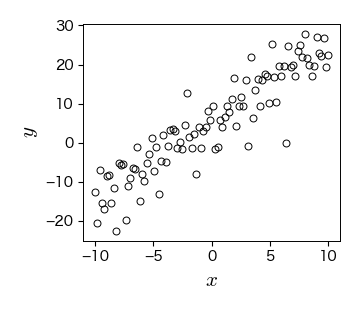

In [7]:
# データをDataFrame形式で読み込む
data = pd.read_csv('./data_linear.csv', header=None, names=['x', 'y'])

# 散布図の描画
fig, ax = plt.subplots()
ax.plot(data['x'], data['y'], 'ko', mfc='None')
ax.set_xlabel('$x$', fontsize=15); ax.set_ylabel('$y$', fontsize=15);

**3. フィッティングを実行する**

`curve_fit` 関数には，第１引数にフィッティング関数，第２，３引数にデータ，それ以降にオプションを指定する．
オプションにはパラメータの初期値 `p0` などを指定することができる．
`curve_fit` 関数を実行すると，最小二乗法によって得られた最適なパラメータ（`p_opt`） と共分散（`p_cov`）が戻り値として得られる．

In [9]:
# フィッティングの実行
p_opt, p_cov = curve_fit(f_linear, data['x'], data['y'], p0=[1, 1])
print(p_opt)

[1.98277627 5.17556142]


以下は公式から得られた最適解を求めた結果である．
確かに，`curve_fit` 関数から求めた値と同じ値が得られていることが分かる．

In [10]:
# 公式から
nume = np.mean(data['x'] * data['y']) - np.mean(data['x']) * np.mean(data['y'])
denom = np.mean(data['x']**2) - np.mean(data['x'])**2
a = nume / denom
b = np.mean(data['y'] - a*data['x'])
print(a, b)

1.9827762695911915 5.175561415627182


**4. フィッティング結果を可視化する**

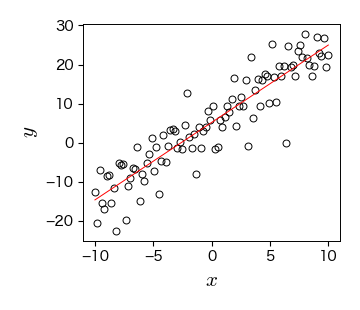

In [11]:
fig, ax = plt.subplots()
ax.plot(data['x'], data['y'], 'ko', mfc='None')
ax.plot(data['x'], f_linear(data['x'], p_opt[0], p_opt[1]), 'r-', mfc='None')
ax.set_xlabel('$x$', fontsize=15); ax.set_ylabel('$y$', fontsize=15);

**5. 決定係数を求める**

In [12]:
# 決定係数
y_reg = f_linear(data['x'], p_opt[0], p_opt[1]) # 回帰直線の値
R2 = 1 - np.var(data['y'] - y_reg) / np.var(data['y']) # 決定係数
R2

0.8436624302090605

In [13]:
# 相関係数の２乗
r_xy = pd.DataFrame(np.c_[data['x'], data['y']]).corr()[0][1] # pandasのcorr()関数で相関係数を計算
r_xy**2

0.8436624302090606

### 非線形単回帰モデル

次に，非線形単回帰モデルを考える．
この場合はフィッティング関数に任意の非線形関数 $ f(x; \boldsymbol{\theta}) $ を指定することができる．
フィッティングの手順は線形単回帰モデルの場合と同様である．

**1. フィッティングに用いる関数を定義する**

In [16]:
def f_exp(x, a, b, c):
    return a * np.exp(-b * x) + c

**2. フィッティング対象となる実データを用意する**

In [17]:
# データの作成
np.random.seed(4321)
x_data = np.linspace(0, 4, 50)
y_data = f_exp(x_data, 2.5, 1.3, 0.5) + 0.2 * np.random.normal(size=len(x_data))
data = np.vstack([x_data, y_data]).T

# データをcsv形式で保存
np.savetxt('./data_exp.csv', data, delimiter=',')

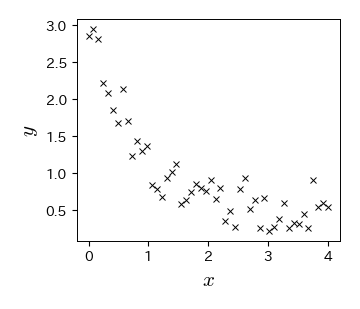

In [18]:
# データをDataFrame形式で読み込む
data = pd.read_csv('./data_exp.csv', header=None, names=['x', 'y'])

# 散布図の描画
fig, ax = plt.subplots()
ax.plot(data['x'], data['y'], 'x')
ax.set_xlabel('$x$', fontsize=15); ax.set_ylabel('$y$', fontsize=15);

**3. フィッティングを実行する**

In [21]:
# フィッティングの実行
p_opt = curve_fit(f_exp, data['x'], data['y'])[0]
print(p_opt)

[2.59425594 1.28716832 0.44943101]


**4. フィッティング結果を可視化する**

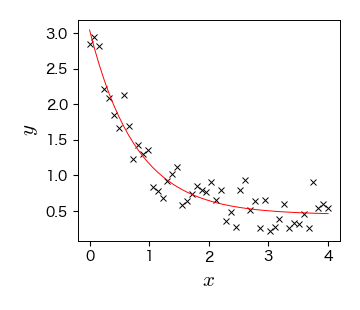

In [22]:
fig, ax = plt.subplots()
ax.plot(data['x'], data['y'], 'x')
ax.plot(data['x'], f_exp(data['x'], p_opt[0], p_opt[1], p_opt[2]), 'r-', mfc='None')

ax.set_xlabel('$x$', fontsize=15); ax.set_ylabel('$y$', fontsize=15);

**5. 決定係数を求める**

In [23]:
# 決定係数
y_reg = f_exp(data['x'], p_opt[0], p_opt[1], p_opt[2]) # 回帰直線の値
R2 = 1 - np.var(data['y']-y_reg) / np.var(data['y']) # 決定係数
R2

0.9161811765106044

#### 演習問題

1. 適当な非線形関数からデータを生成し，手順１〜５に従ってカーブフィッティングを実行せよ．
2. [soccer_player_europe_2017.csv](https://drive.google.com/uc?export=download&id=13NU87F430KkYJGJZrY44aQECBLjSjKnf)は2017シーズンにサッカーのヨーロッパ5大リーグに所属していた選手のプロフィールである．これをPandasのDataFrameに読み込み，体重（`weight`）が0の選手を削除せよ．体重（`weight`）と身長（`height`）の散布図を描き，線形単回帰モデルによるカーブフィッティングを実行せよ．
3. [covid19_korea.csv](https://drive.google.com/uc?export=download&id=14l9chvX4PqHMQQl2yTQTPm7J7S5Us6Xz)は，韓国における新型コロナウイルス感染者数の推移データである．このデータを読み込み，横軸に2020年1月22日を0日とした経過日数，縦軸に感染者数を取った散布図を描け．50日目までと100日目までの散布図に対して，以下のシグモイド関数によるフィッティングを実行せよ．
   
   $$
   f(t) = \frac{a}{1+b\mathrm{e}^{-ct}}
   $$
   
   ※ 本データの出典：[John Hopkins CSSE](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series)

## 確率分布のパラメータ推定


手元にあるデータから作成したヒストグラムがある確率分布に従うと仮定し，データに合うように確率分布のパラメータを推定することもカーブフィッティングの一つである．

確率分布のパラメータ推定では，以下の方法がよく用いられる：

- 最小二乗法
- 最尤推定

このうち，最小二乗法によるパラメータ推定は回帰分析と手続きは同じである．
そこで，以下では最尤推定を扱う．

### ヒストグラムの作成とフィッティング

準備として`scipy`から主要な確率分布をインポートしておく：

In [6]:
from scipy.stats import bernoulli, norm, poisson, expon

また，与えられた観測データからヒストグラムを描画し，適当な確率分布をフィッティングするプログラムを作成しておく．

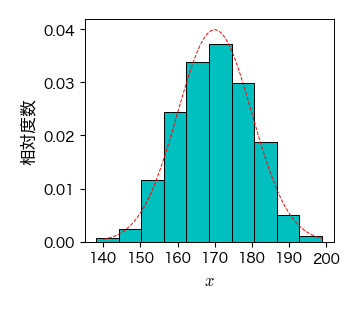

In [7]:
# データの作成（正規分布に従う1000個のデータ）
np.random.seed(20)
x_data = sp.stats.norm.rvs(loc=170, scale=10, size=1000)

# ヒストグラムの描画
fig, ax = plt.subplots()
ret = ax.hist(x_data, bins=10, density=1, color='c', edgecolor='k')
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('相対度数', fontsize=12)
ax.set_xticks(np.arange(130, 210, 10));

# フィッティング
x = np.arange(140, 200)
ax.plot(x, norm.pdf(x, loc=170, scale=10), 'r--')

### 最尤推定

これまで，パラメータ $ \boldsymbol{\theta} $ を持つ１次元確率分布を $ f(x; \boldsymbol{\theta}) $ と表記していたが，変数と定数の区別を強調するために，これ以降は $ f(x|\boldsymbol{\theta}) $ と表記する．
例えば，$ f(x|\boldsymbol{\theta}) $ と書いたときは，$ \boldsymbol{\theta} $ は与えられた定数，$ x $ は変数を表しており，$ f(x|\boldsymbol{\theta}) $ は $ x $ の関数であると解釈できる．

いま，手元にある $ n $ 個のデータ $ (x_{1}, x_{2}, \ldots, x_{n}) $ が確率分布 $ f(x|\boldsymbol{\theta}) $ から独立に得られたとする．
このとき，$ x_{i} $ というデータが得られる確率は $ f(x_{i}|\boldsymbol{\theta}) $ であるので，手元にある $ n $ 個のデータが得られる確率は

$$
    f(x_{1}, x_{2},\ldots, x_{n}|\boldsymbol{\theta}) = \prod_{i=1}^{n} f(x_{i}|\boldsymbol{\theta})
$$

と表される．
このように，確率を $ f(x_{1}, x_{2},\ldots, x_{n}|\boldsymbol{\theta}) $ と書いたときは，パラメータ $ \boldsymbol{\theta} $ が固定されており，手元のデータ $ (x_{1}, x_{2}, \ldots, x_{n}) $ を変数と捉えている．
これは，データの生成元から見た視点と考えることができる．

一方，この状況をデータの観測者から見ると，手元のデータ $ (x_{1},\ x_{2},\ \ldots, x_{n}) $ に対して，このデータの生成元となった確率分布のパラメータ $ \boldsymbol{\theta} $ はどのような値だったのだろうか？という見方ができる．
このような捉え方をすると，手元のデータ $ (x_{1},\ x_{2},\ \ldots, x_{n}) $ は定数で，パラメータ $ \boldsymbol{\theta} $ は変数と考えていることになる．
そこで，確率 $ f(x_{1}, x_{2},\ldots, x_{n}|\boldsymbol{\theta}) $ について，$ (x_{1},\ x_{2},\ \ldots, x_{n}) $ を定数，パラメータ $ \boldsymbol{\theta} $ を変数と捉えた場合の関数を

$$
    L(\boldsymbol{\theta}|x_{1},\ldots, x_{n}) = \prod_{i=1}^{n} f(x_{i}|\boldsymbol{\theta})
$$

と表記し，これを**尤度関数**と呼ぶことにする．

さて，尤度関数というのは，手元のデータが得られる確率を，生成元となった確率分布のパラメータ $ \boldsymbol{\theta} $ の関数と捉えたものである．
いま，生成元の確率分布のパラメータがどのような値なら尤もらしいか？と考えると，尤度が小さくなるようなパラメータはあり得ないことが起こっているので不適切である．
そこで，手元に $ n $ 個のデータが与えられたとき，尤度関数 $ L(\boldsymbol{\theta}|x_{1}, x_{2},\ldots, x_{n}) $ を最大にするように生成元の確率分布のパラメータ $ \boldsymbol{\theta} $ を最も尤もらしいパラメータと考えることにする．
これは，確率分布のパラメータ推定の手法の一つであり，**最尤推定法**と呼ばれている．

尤度関数を最大にするようなパラメータを求めるには，尤度関数を各パラメータで偏微分して0になるという条件を課せば良いが，尤度関数は確率$ f(x_{i}|\theta) $の積として定義されるので，パラメータによる偏微分は面倒である．
そこで，通常は尤度関数の対数を取った**対数尤度関数**を考え，これを最大化するパラメータを考える：

$$
    \frac{\partial \log L}{\partial \theta_{1}} = 0, \quad \frac{\partial \log L}{\partial \theta_{2}} = 0, \quad \cdots, \quad \frac{\partial \log L}{\partial \theta_{n}} = 0
$$

この条件式は**対数尤度方程式**と呼ばれている．
このように対数尤度関数を考えると，尤度関数の積が和の形に分解できるので計算が簡単になるが，得られる解は尤度関数を偏微分した場合と変わらないので非常に便利である．
なお，最尤推定値が求まるかどうかは対数尤度関数の形によって異なる．
例えば，対数尤度関数が凸関数の場合には対数尤度方程式を解くことで大域解が求まるが，非凸関数の場合にはその限りではない．
また，通常は対数尤度関数が非常に複雑な形をしているため，解析解を得ることは難しく，様々なアルゴリズム（例えばEMアルゴリズムなど）が考案されている．

### ベルヌーイ分布

#### 解析解

ベルヌーイ分布は以下の式で与えられる：

$$
    f(x|p) = p^{x}(1-p)^{1-x}
$$

ただし，$ x $ の取りうる値は $ 0, 1 $ のみである．
観測データ $ x_{1}, \ldots, x_{n} $ に対する尤度関数は

$$
    L(p|x_{1}, \ldots, x_{n}) = p^{\sum_{i}x_{i}}(1-p)^{n-\sum_{i}x_{i}}
$$

対数尤度関数は

$$
    \log L(p|x_{1}, \ldots, x_{n}) = \left(\sum_{i} x_{i}\right) \log p + \left(n-\sum_{i}x_{i}\right)\log(1-p)
$$

となる．

これより，対数尤度方程式は

$$
    \frac{dL}{dp} = \frac{\sum_{i}x_{i}}{p} - \frac{n-\sum_{i}x_{i}}{1-p} = 0
$$

となり，これを解けば

$$
    p = \frac{1}{n} \sum_{i=1}^{n} x_{i}
$$

が得られる．
すなわち，$ p $ の最尤推定値は観測データの標本平均である．

#### Pythonによる実装

ここでは，$ p=0.3 $ のベルヌーイ分布からサイズ100の標本を得る場合を考える．
すなわち，$ p=0.3 $ がパラメータの真の値である．

In [2]:
np.random.seed(seed=32)
p = 0.3
x = bernoulli.rvs(p, size=100)
x

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0])

次に，得られた標本（観測データ）から尤度関数を求める．

In [3]:
L = []
P = np.arange(0, 1, 0.01)

# 様々なPについて尤度を計算する
for p in P:
    l = np.prod(bernoulli.pmf(x, p))
    L.append(l)

L = np.array(L)

最後に，尤度関数を描画し，さらに尤度関数が最大となる $ p $ の値をグラフ中にプロットする．

最尤推定値： 0.26


(0.0, 1.3603279030607903e-25)

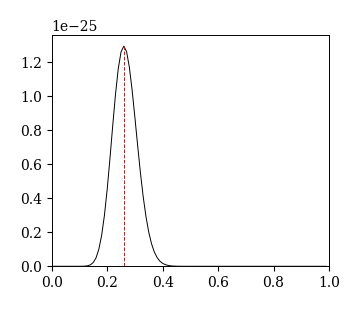

In [4]:
# 尤度関数の描画
fig, ax = plt.subplots()
ax.plot(P, L)
ax.vlines(P[np.argmax(L)], 0, np.max(L), color='r', linestyles='dashed')
print('最尤推定値：', P[np.argmax(L)])
ax.set_xlim(0, 1); ax.set_ylim(ymin=0)

得られた最尤推定値は $ p=0.26 $ であるが，これは解析解である標本平均と一致している．

### 正規分布

#### 解析解

正規分布の確率密度関数は以下で与えられる：

$$
    f(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \mathrm{e}^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

観測データ $ x_{1}, \ldots, x_{n} $ に対する尤度関数は

$$
    L(\mu, \sigma|x_{1}, \ldots, x_{n}) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \mathrm{e}^{-\frac{(x_{i}-\mu)^2}{2\sigma^2}}
    = \frac{1}{(2\pi\sigma^2)^{n/2}} \exp\left[-\frac{1}{2\sigma^2}\sum_{i=1}^{n}(x-\mu)^2\right]
$$

対数尤度関数は

$$
    \log L = -\frac{n}{2} \log(2\pi) -\frac{n}{2} \log(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_{i}-\mu)^2
$$

である．

これより，対数尤度方程式は

\begin{align*}
    \frac{\partial L}{\partial \mu} &= -\frac{1}{2\sigma^2} \sum_{i}^{n}2(x_{i}-\mu)\times (-1)
    = \frac{1}{\sigma^2}\sum_{i}^{n}(x_{i}-\mu) = 0 \\
    \frac{\partial L}{\partial \sigma^2} &= -\frac{n}{2\sigma^2} - \frac{1}{2\sigma^4} \sum_{i=1}^{n} (x_{i} - \mu)^2 = 0
\end{align*}

となり，これらを解けば，

\begin{align*}
    \mu &= \frac{1}{n}\sum_{i=1}^{n}x_{i}\\
    \sigma^2 &= \frac{1}{n}\sum_{i=1}^{n}(x_{i}-\mu)^2
\end{align*}

が得られる．
すなわち，$ \mu,\ \sigma^2 $ の最尤推定値はそれぞれ標本平均と標本分散である．

#### Pythonによる実装

In [37]:
# 1. 標準正規分布からサイズ100の標本を生成する
np.random.seed(seed=32)
mu, sigma = 0, 1
x = norm.rvs(loc=mu, scale=sigma, size=100)

In [115]:
# 2. この標本を基に，正規分布の平均と標準偏差をx, y軸，尤度関数をz軸とするグラフを描画する
mean_range = np.linspace(-0.1, 0.1, 100)
std_dev_range = np.linspace(0.9, 1.1, 100)
M, S = np.meshgrid(mean_range, std_dev_range)
L = []

for m, s in zip(M.ravel(), S.ravel()):
    # L.append(np.log(np.prod(norm.pdf(x, loc=m, scale=s))))
    L.append(np.prod(norm.pdf(x, loc=m, scale=s)))

L = np.array(L).reshape(M.shape)

Text(0.5, 0, 'Likelihood')

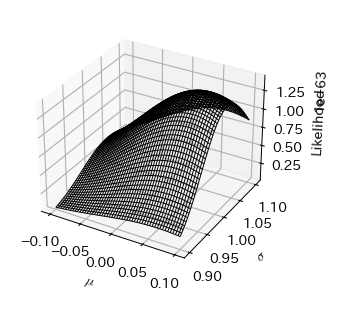

In [111]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.plot_wireframe(M, S, L)
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\sigma$')
ax.set_zlabel('Likelihood')

In [112]:
# 3. 最尤推定値を計算する
mle_mean = np.mean(x)
mle_std_dev = np.std(x, ddof=0)

print(f'MLE of mean: {mle_mean}')
print(f'MLE of standard deviation: {mle_std_dev}')

MLE of mean: 0.06368595578464202
MLE of standard deviation: 1.02857877771493


In [113]:
M[np.where(L==L.max())]

array([0.0638796])

In [114]:
S[np.where(L==L.max())]

array([1.02842809])

**求めたパラメータでカーブフィッティング**

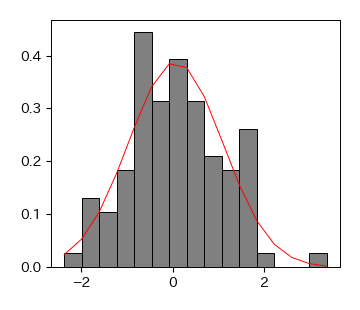

In [128]:
# ヒストグラムの描画
fig, ax = plt.subplots()
ret = ax.hist(x, bins=15, density=1, color='gray', edgecolor='k')
ax.plot(ret[1], norm.pdf(ret[1], loc=mle_mean, scale=mle_std_dev), 'r-')

### 演習問題

**指数分布の最尤推定**

指数分布

$$
    f(x|\lambda) = \frac{1}{\lambda}\mathrm{e}^{-\frac{x}{\lambda}}
$$

について，最尤推定値の解析解を計算せよ．
また，適当な $ \lambda $ の値について最尤推定値を求めるPythonプログラムを作成せよ．

**ポアソン分布の最尤推定**

ポアソン分布

$$
    f(x|\lambda) = \frac{\lambda^{x}\mathrm{e}^{-\lambda}}{k!}
$$

について，最尤推定値の解析解を計算せよ．
また，適当な $ \lambda $ の値について最尤推定値を求めるPythonプログラムを作成せよ．